In [65]:
import pandas as pd

In [7]:
customer = pd.read_csv("data/customers_c.csv")
transactions = pd.read_csv("data/transactions_c.csv")
articles = pd.read_csv("data/articles_c.csv")

In [71]:
# 상위 5행 확인
print(customer.head())
print(transactions.head())
print(articles.head())

                                         customer_id  FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...   0       0   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...   0       0   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   0       0   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...   0       0   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...   1       1   

  club_member_status fashion_news_frequency  age  
0             ACTIVE                   NONE   49  
1             ACTIVE                   NONE   25  
2             ACTIVE                   NONE   24  
3             ACTIVE                   NONE   54  
4             ACTIVE              Regularly   52  
        t_dat                                        customer_id  article_id  \
0  2019-11-05  3e2b60b679e62fb49516105b975560082922011dd752ec...   698328010   
1  2019-05-22  89647ac2274f54c770aaa4b326e0eea09610c252381f37...   760597002   
2  2019-05-10  2ebe392150feb60ca89caa8eff6c08

In [73]:
# 결측치 확인
print(customer.isnull().sum())
print(transactions.isnull().sum())
print(articles.isnull().sum())

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    1
age                       0
dtype: int64
t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64
article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_

In [74]:
# 고객-거래-상품 조인
df = transactions.merge(customer, on="customer_id", how="inner")
df = df.merge(articles, on="article_id", how="inner")

In [75]:
# 날짜 처리
df["t_dat"] = pd.to_datetime(df["t_dat"])
df["year"] = df["t_dat"].dt.year
df["month"] = df["t_dat"].dt.month
df["weekday"] = df["t_dat"].dt.day_name()

In [76]:
print(f"제거 전 데이터 개수: {len(df)}")
df = df.dropna() 
print(f"결측치 제거 후 데이터 개수: {len(df)}")

제거 전 데이터 개수: 812931
결측치 제거 후 데이터 개수: 809401


In [77]:
# 위에서 만든 'year' 컬럼을 사용해서 2019년 기록만 남깁니다.
df_2019 = df[df["year"] == 2019].copy()

In [79]:
# 가격(price)이 0이거나 음수인 말도 안 되는 데이터가 있는지 확인하고 제거합니다.
# H&M 데이터 특성상 가격이 너무 높거나 낮은 극단값도 여기서 조정할 수 있습니다.
df_2019 = df_2019[df_2019["price"] > 0]

print(f"✅ 2019년 정제 완료! 최종 데이터 개수: {len(df_2019)}")
df_2019.head()

✅ 2019년 정제 완료! 최종 데이터 개수: 809401


,t_dat,customer_id,article_id,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,...,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,year,month,weekday
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,1,1,ACTIVE,Regularly,51,...,2,Divided,53,Divided Collection,1005,Jersey Fancy,Top in lightweight sweatshirt fabric with drop...,2019,11,Tuesday
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2,0,0,ACTIVE,NONE,28,...,1,Ladieswear,6,Womens Casual,1005,Jersey Fancy,"Short-sleeved blouse in stretch, textured jers...",2019,5,Wednesday
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2,1,1,ACTIVE,Regularly,37,...,3,Menswear,21,Contemporary Casual,1025,Shorts,Knee-length shorts in soft washed cotton with ...,2019,5,Friday
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2,0,0,ACTIVE,NONE,19,...,1,Ladieswear,65,Womens Big accessories,1019,Accessories,Shopper in grained imitation leather with two ...,2019,8,Monday
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1,0,0,ACTIVE,NONE,35,...,3,Menswear,26,Men Underwear,1021,Socks and Tights,"Socks in a soft, fine-knit cotton blend with r...",2019,8,Saturday


In [81]:
# 3. 상품명별 대표 ID 추출 (중복 모델 통합용)
df_rep_id = articles.groupby('prod_name')['article_id'].min().reset_index()

df_rep_id.columns = ['prod_name', 'rep_article_id']

print("✅ 상품명별 대표 ID 추출 완료")
print(df_rep_id.head())

✅ 상품명별 대표 ID 추출 완료
                    prod_name  rep_article_id
0  & Denim Boyfriend LW denim       549262001
1  & Denim Jen bermuda shorts       652991001
2     &DENIM Bootcut RW Speed       652946001
3      &DENIM Bootcut RW soho       615796001
4         &DENIM Boyfriend LW       698381001


In [87]:
import pandas as pd

# 1. 각 상품명(prod_name)별로 가장 대표가 되는 ID(가장 작은 번호)를 미리 뽑아둡니다.
df_representative_id = df_items.groupby('prod_name')['article_id'].min().reset_index()
df_representative_id.columns = ['prod_name', 'rep_article_id']

# 2. 1월~12월 데이터를 통합합니다.
monthly_top5_list = []

for m in range(1, 13):
    df_month = df_2019[df_2019['month'] == m]
    
    #상품명으로 묶어서 매출과 판매량 합산
    top5 = df_month.groupby('prod_name').agg({
                'price': 'sum',
                'sales_count': 'sum'
    }).reset_index()


    # 매출 상위 5개 추출
    top_5 = top_5.nlargest(5, 'revenue')
    top_5['month'] = m
    
    # 3. 미리 뽑아둔 '대표 ID'를 이름에 맞게 붙여줍니다
    top_5 = top_5.drop(columns=['rep_article_id'], errors='ignore')
    top_5 = pd.merge(top_5, df_representative_id, on='prod_name', how='left')

    monthly_top5_list.append(top_5)

# 결과 합치기 및 보기 좋게 정리
df_final_fixed = pd.concat(monthly_top5_list)
df_final_fixed = df_final_fixed[['month', 'prod_name', 'rep_article_id', 'revenue', 'sales_count']]

print("✅ 1월~12월 월별 통합 top 5")

display(df_final_fixed.style.hide(axis='index'))


✅ 1월~12월 월별 통합 top 5


month,prod_name,rep_article_id,revenue,sales_count
1,Luna skinny RW,562245001,12.092864,477
1,Jade HW Skinny Denim TRS,706016001,12.074373,373
1,Femme (1),534181001,8.179068,70
1,Madison skinny HW (1),573085004,7.897254,309
1,Embrace S.Skinny Ankle H.W,687704001,6.782475,114
2,Luna skinny RW,562245001,12.092864,477
2,Jade HW Skinny Denim TRS,706016001,12.074373,373
2,Femme (1),534181001,8.179068,70
2,Madison skinny HW (1),573085004,7.897254,309
2,Embrace S.Skinny Ankle H.W,687704001,6.782475,114


C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\1408918072.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화


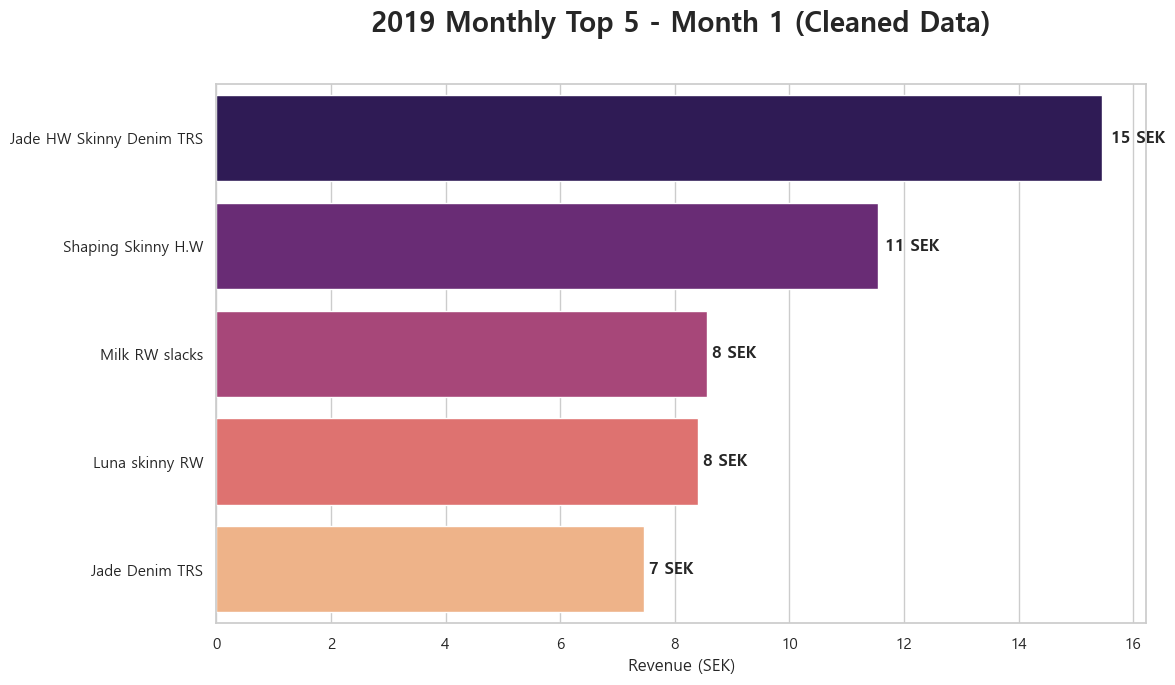

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\1408918072.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화


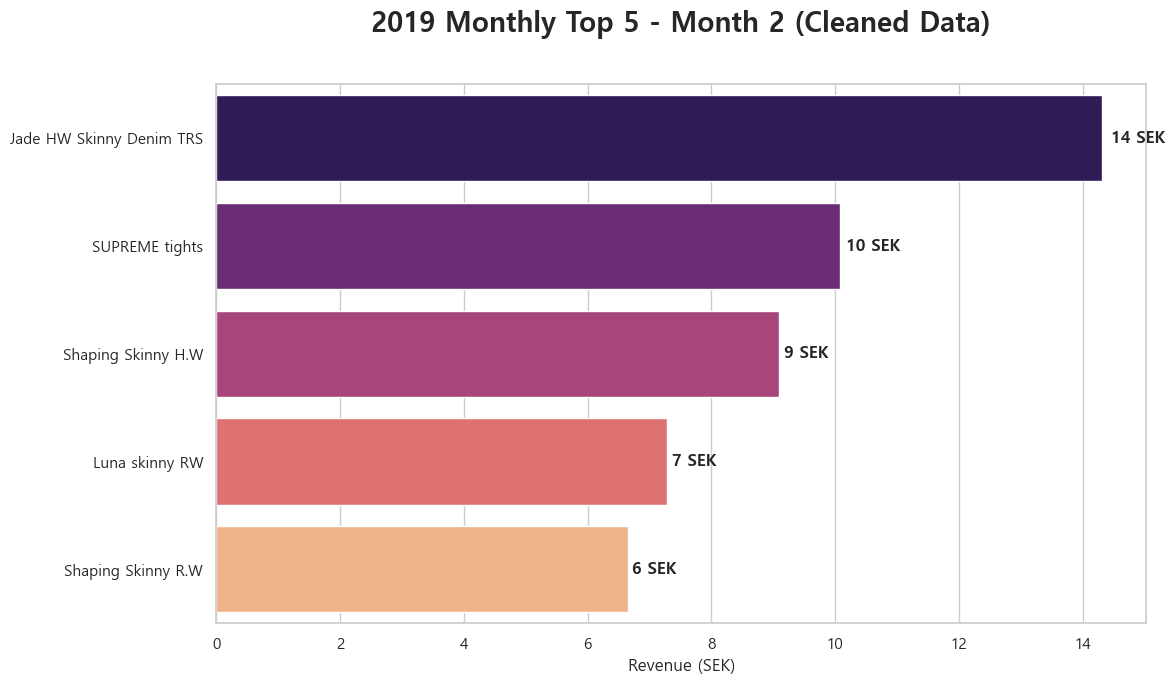

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\1408918072.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화


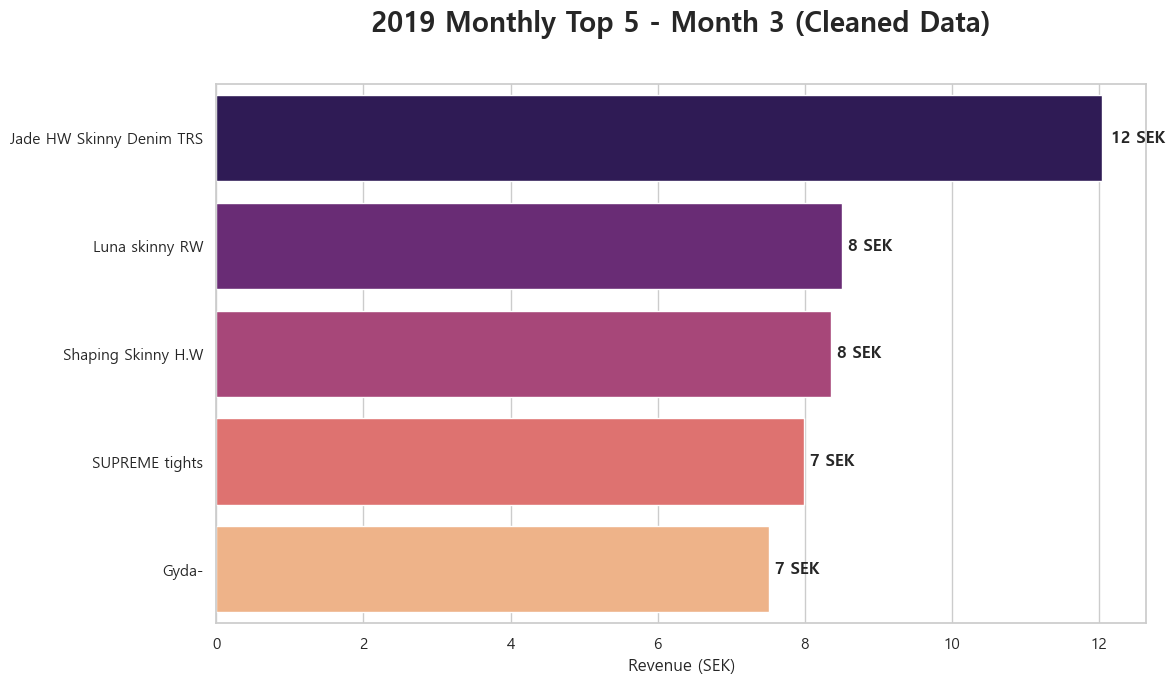

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\1408918072.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화


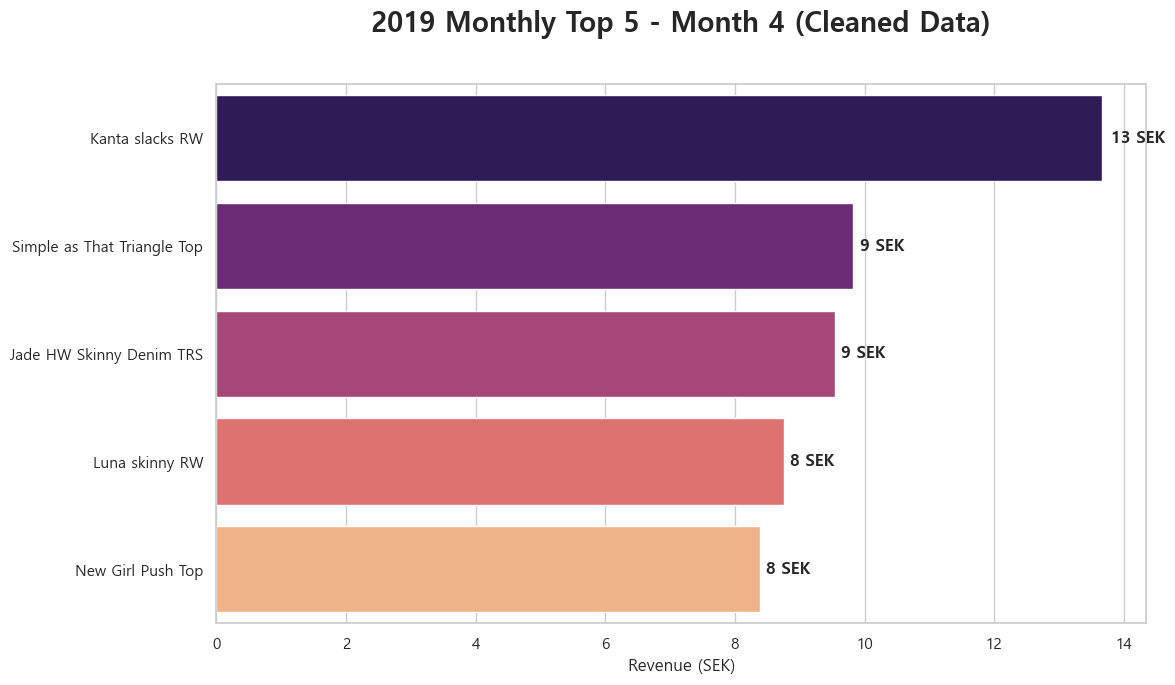

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\1408918072.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화


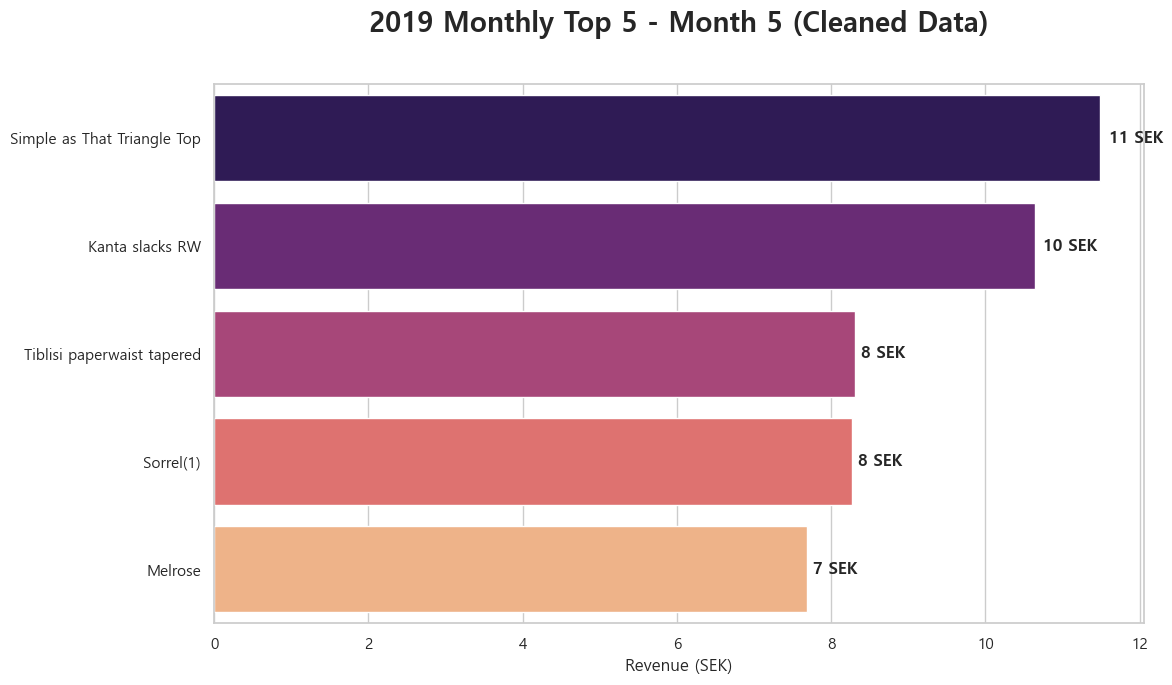

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\1408918072.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화


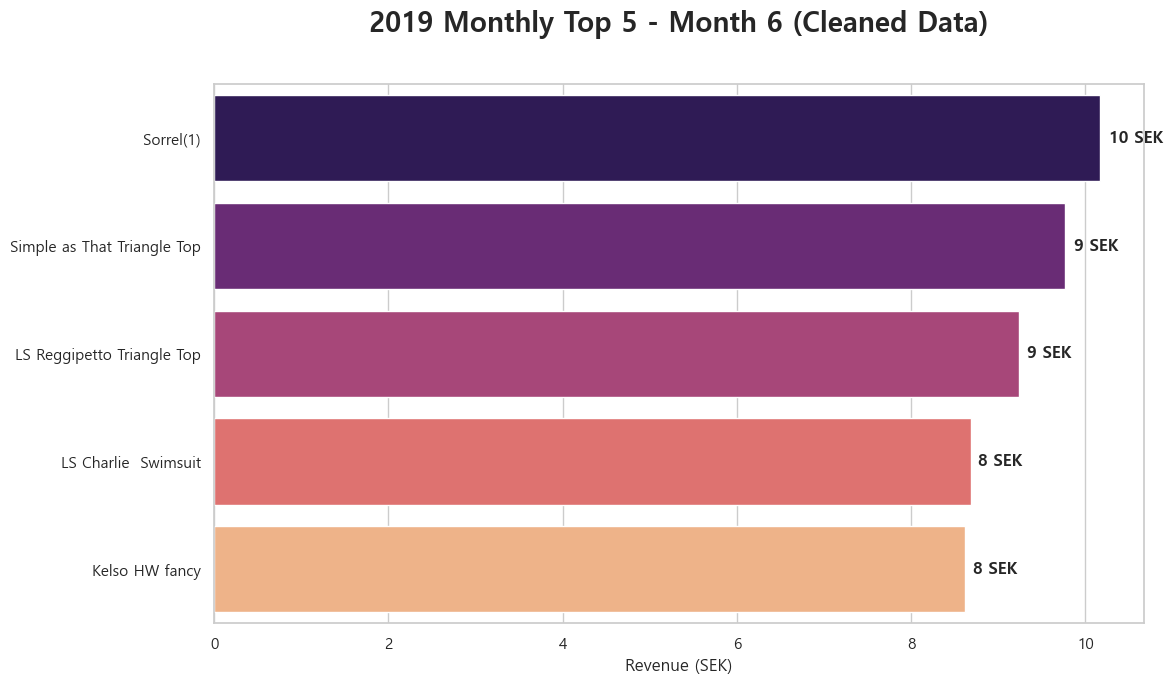

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\1408918072.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화


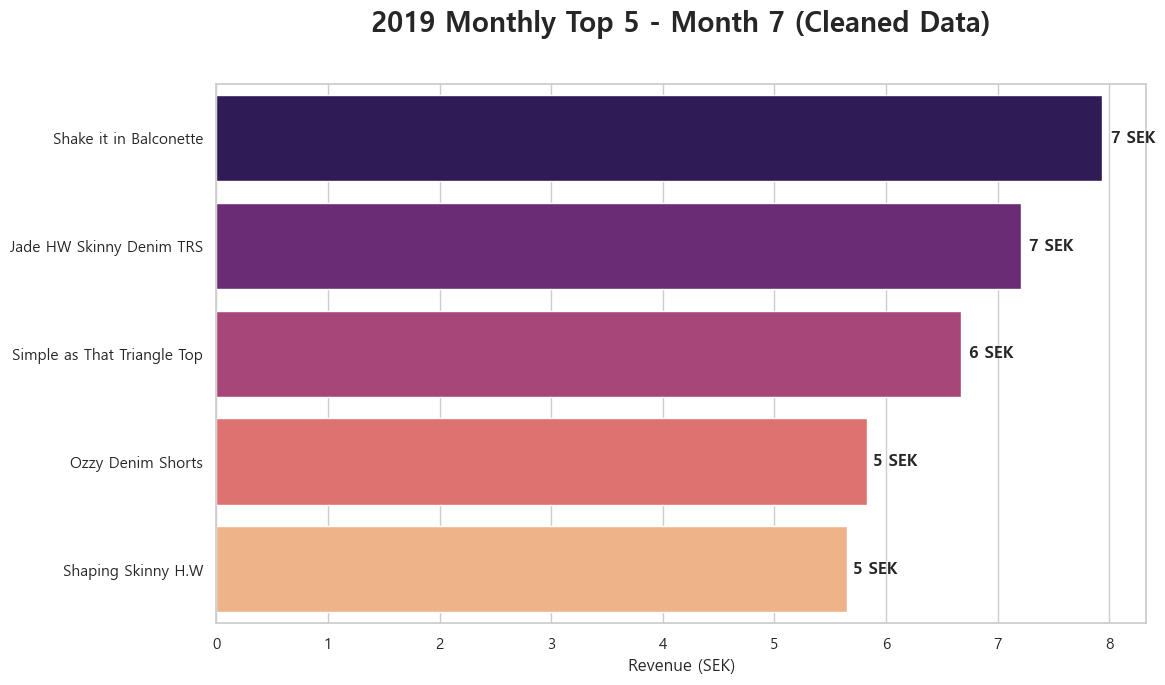

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\1408918072.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화


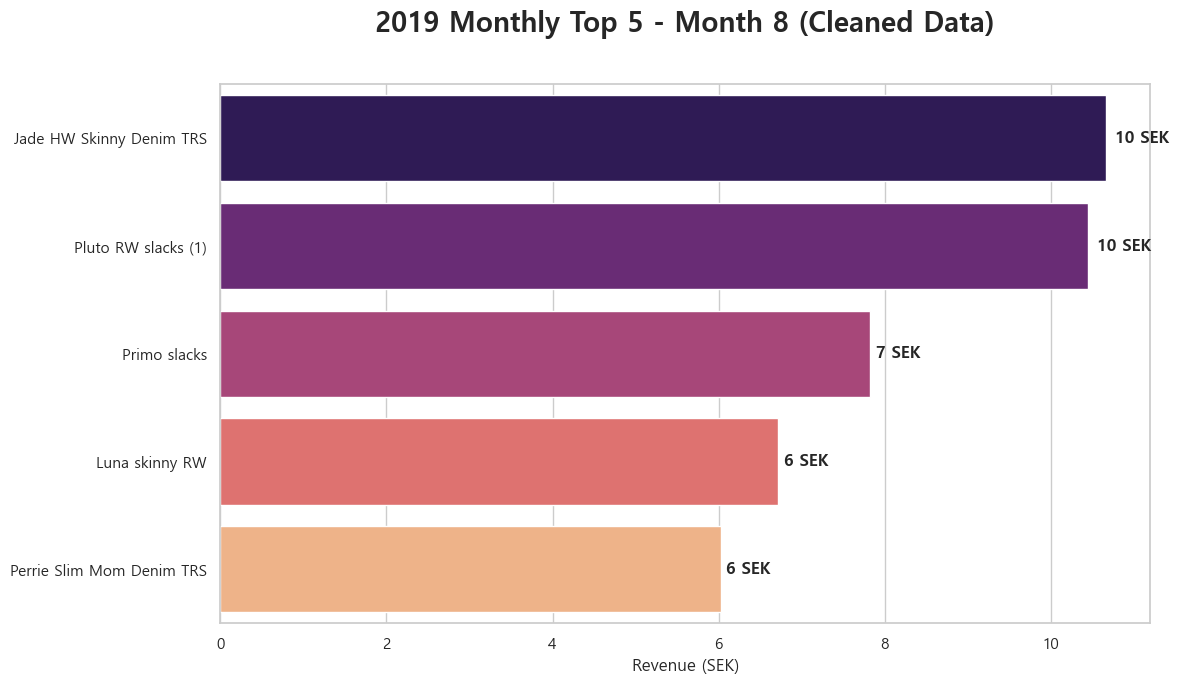

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\1408918072.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화


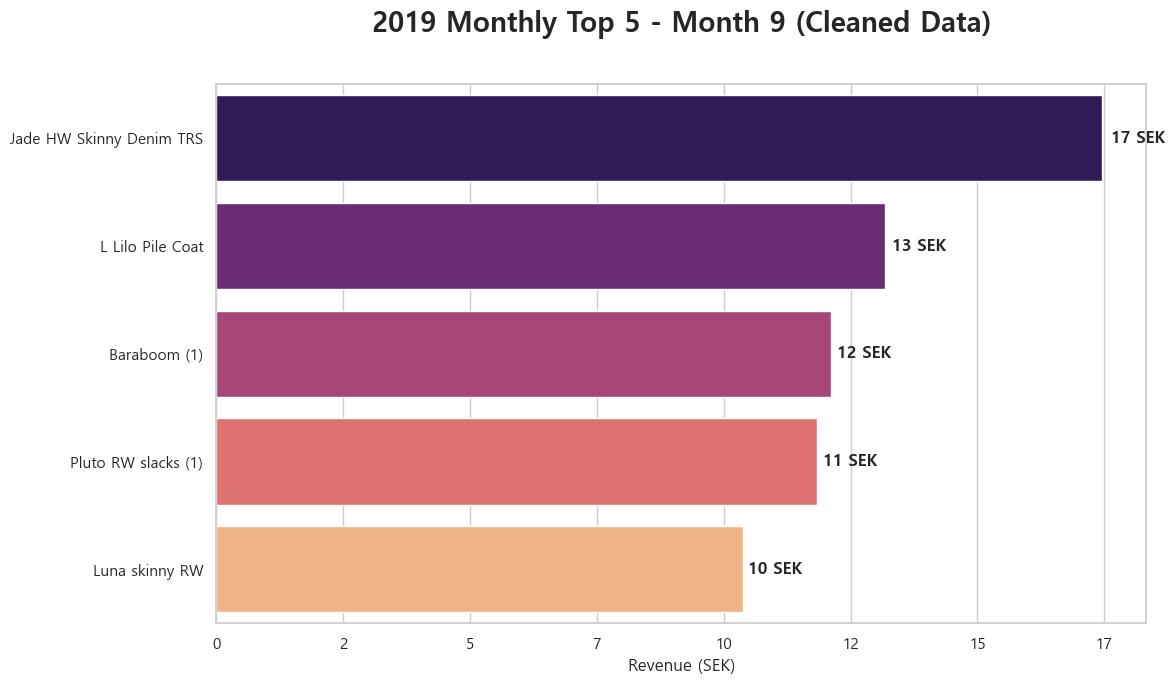

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\1408918072.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화


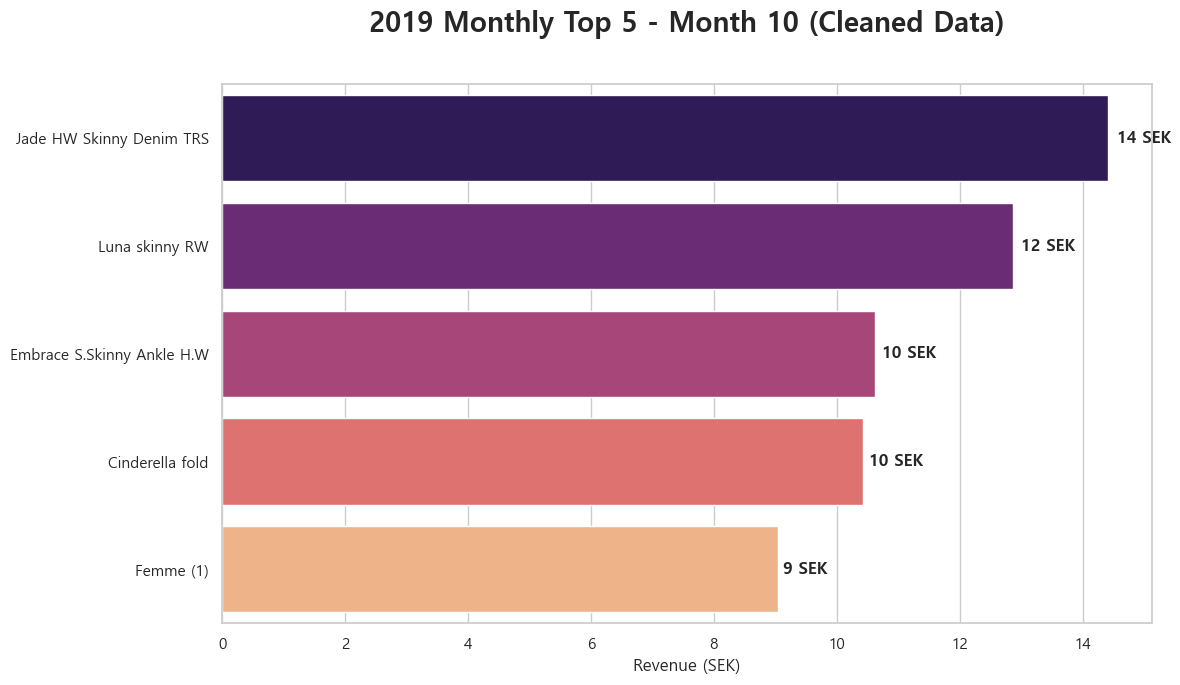

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\1408918072.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화


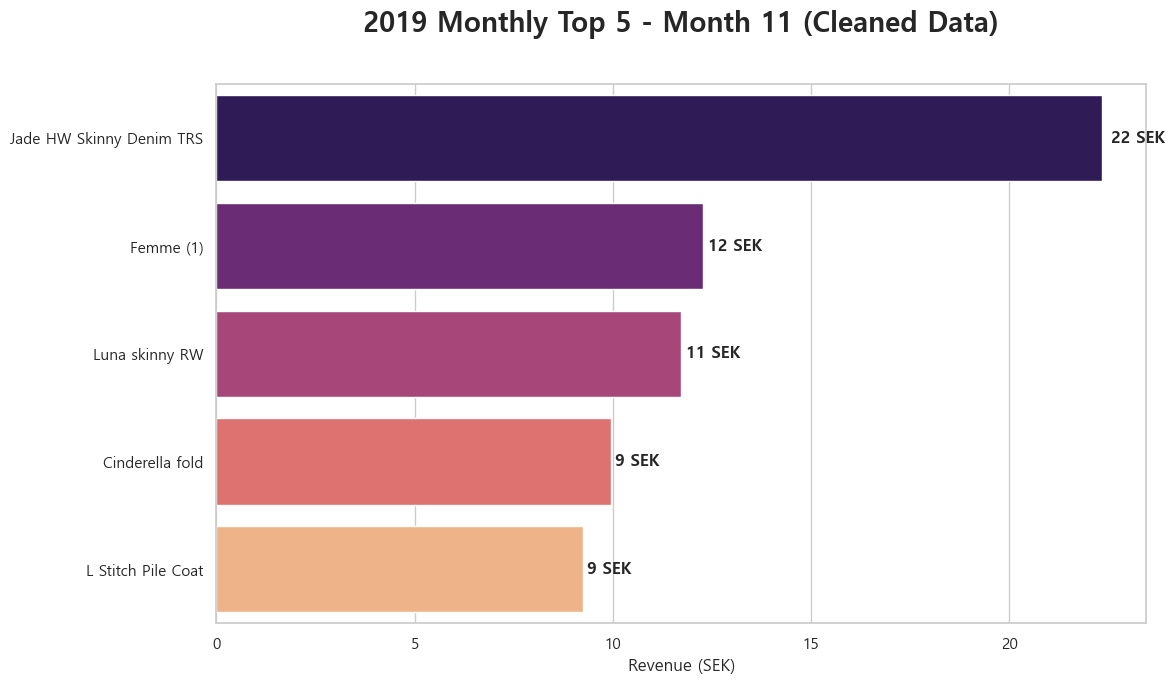

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\1408918072.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화


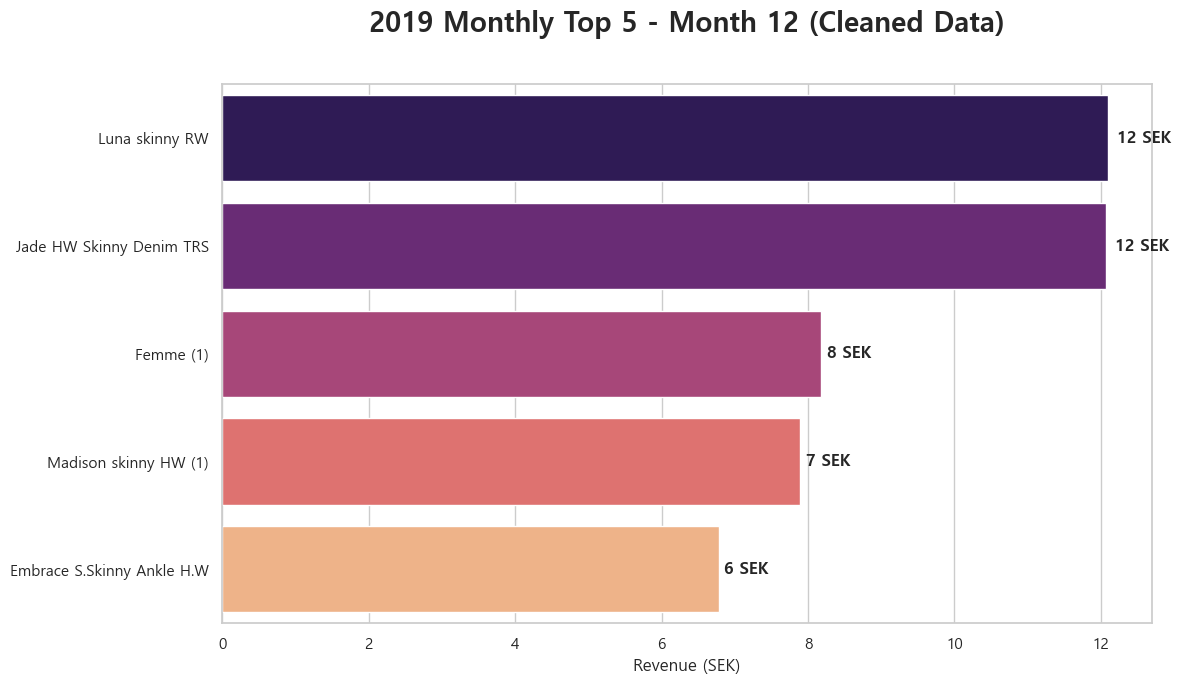

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import os

# 스타일 설정
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic'

DATA_PATH = "./data/"

# 1. 컬럼 선택 로드 및 필터링
transactions = pd.read_csv(os.path.join(DATA_PATH, "transactions_hm.csv"), usecols=['t_dat', 'customer_id', 'article_id', 'price'])
articles = pd.read_csv(os.path.join(DATA_PATH, "articles_hm.csv"), usecols=['article_id', 'prod_name'])
customer = pd.read_csv(os.path.join(DATA_PATH, "customer_hm.csv"), usecols=['customer_id'])

transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
df_2019 = transactions[transactions['t_dat'].dt.year == 2019].copy()
df_2019['month'] = df_2019['t_dat'].dt.month
del transactions

# 2. 정밀한 결합 (Inner Join & 결측치 제거)
df_clean = df_2019.merge(customer, on="customer_id", how="inner").merge(articles, on="article_id", how="inner")
df_clean = df_clean.dropna(subset=['prod_name'])

# 3. 1~12월 그래프 순차 출력
for m in range(1, 13):
    data = df_clean[df_clean['month'] == m].groupby('prod_name')['price'].sum().nlargest(5).reset_index()
    data.columns = ['prod_name', 'revenue']
    if data.empty: continue
        
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='magma') # 색상 차별화
    
    # 상단 제목 (빨간 동그라미 스타일)
    plt.title(f'2019 Monthly Top 5 - Month {m} (Cleaned Data)', fontsize=20, pad=30, fontweight='bold', y=1.02)
    
    # 막대 옆 금액 표시
    for p in ax.patches:
        ax.text(p.get_width() * 1.01, p.get_y() + p.get_height()/2, f'{int(p.get_width()):,} SEK', va='center', fontweight='bold')
    
    # X축 포맷 설정
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.xlabel('Revenue (SEK)', fontsize=12)
    plt.ylabel('')
    plt.subplots_adjust(top=0.88)
    plt.show()

In [111]:
import pandas as pd
import os

# 1. 경로 설정 및 데이터 로드 (어제와 동일한 환경 구축)
DATA_PATH = "./data/"
customer = pd.read_csv(os.path.join(DATA_PATH, "customer_hm.csv"))
transactions = pd.read_csv(os.path.join(DATA_PATH, "transactions_hm.csv"))
articles = pd.read_csv(os.path.join(DATA_PATH, "articles_hm.csv"))

# 2. 모든 데이터를 살리는 Left Join (이미지 1의 inner를 left로 변경)
df_all = transactions.merge(customer, on="customer_id", how="left")
df_all = df_all.merge(articles, on="article_id", how="left")

# 3. 날짜 데이터 처리
df_all["t_dat"] = pd.to_datetime(df_all["t_dat"])
df_all["year"] = df_all["t_dat"].dt.year
df_all["month"] = df_all["t_dat"].dt.month

# 4. 2019년 필터링 (결측치 제거 없이 진행)
df_2019_all = df_all[df_all["year"] == 2019].copy()
df_2019_all['revenue'] = df_2019_all['price']
df_2019_all['sales_count'] = 1

# 5. 1~12월 루프를 돌며 TOP 5 집계
monthly_top5_all_list = []

for m in range(1, 13):
    # 해당 월 필터링
    df_month = df_2019_all[df_2019_all['month'] == m]
    
    # 매출 기준 TOP 5 추출 (결측 데이터도 이름이 있다면 포함됨)
    top_5 = df_month.groupby('prod_name').agg({
        'revenue': 'sum', 
        'sales_count': 'sum'
    }).nlargest(5, 'revenue').reset_index()
    
    top_5['month'] = m
    
    # 대표 ID 연결
    top_5 = pd.merge(top_5, df_representative_id, on='prod_name', how='left')
    monthly_top5_all_list.append(top_5)

# 최종 결과 합치기
df_final_all = pd.concat(monthly_top5_all_list)

print("✅ [모든 데이터 포함 버전] 1~12월 월별 통합 TOP 5 분석 완료")
display(df_final_all.style.hide(axis='index'))

✅ [모든 데이터 포함 버전] 1~12월 월별 통합 TOP 5 분석 완료


prod_name,revenue,sales_count,month,rep_article_id
Jade HW Skinny Denim TRS,19.949390,595,1,706016001
Shaping Skinny H.W,14.767949,190,1,399201002
Milk RW slacks,11.100864,332,1,695545001
Luna skinny RW,10.519254,348,1,562245001
Jade Denim TRS,9.642610,423,1,539723001
Jade HW Skinny Denim TRS,17.629051,541,2,706016001
SUPREME tights,13.422322,421,2,484398001
Shaping Skinny H.W,11.706254,150,2,399201002
Luna skinny RW,9.427830,310,2,562245001
Shaping Skinny R.W,8.609220,120,2,399136011


C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\3129979546.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')


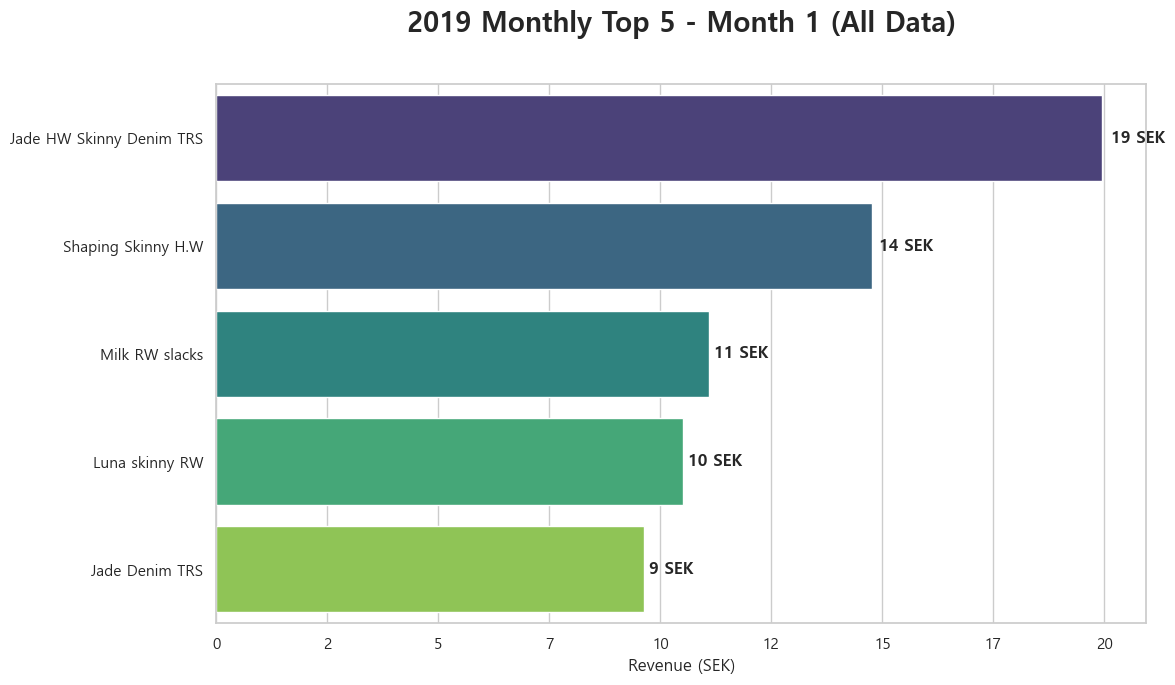

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\3129979546.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')


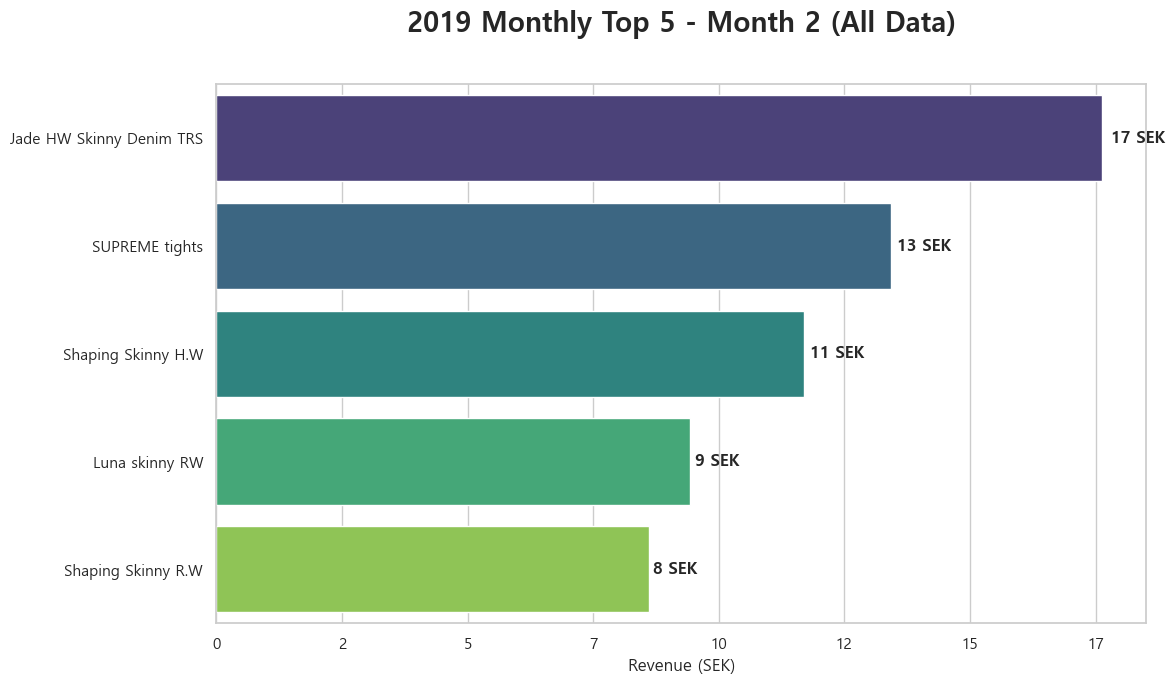

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\3129979546.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')


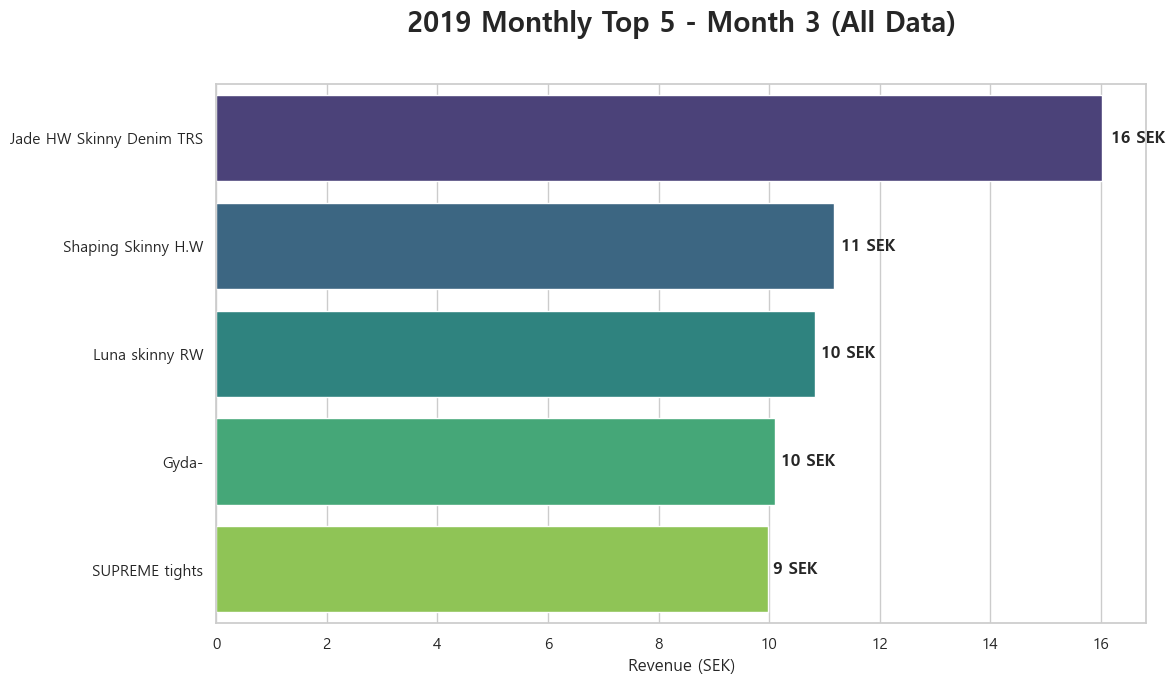

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\3129979546.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')


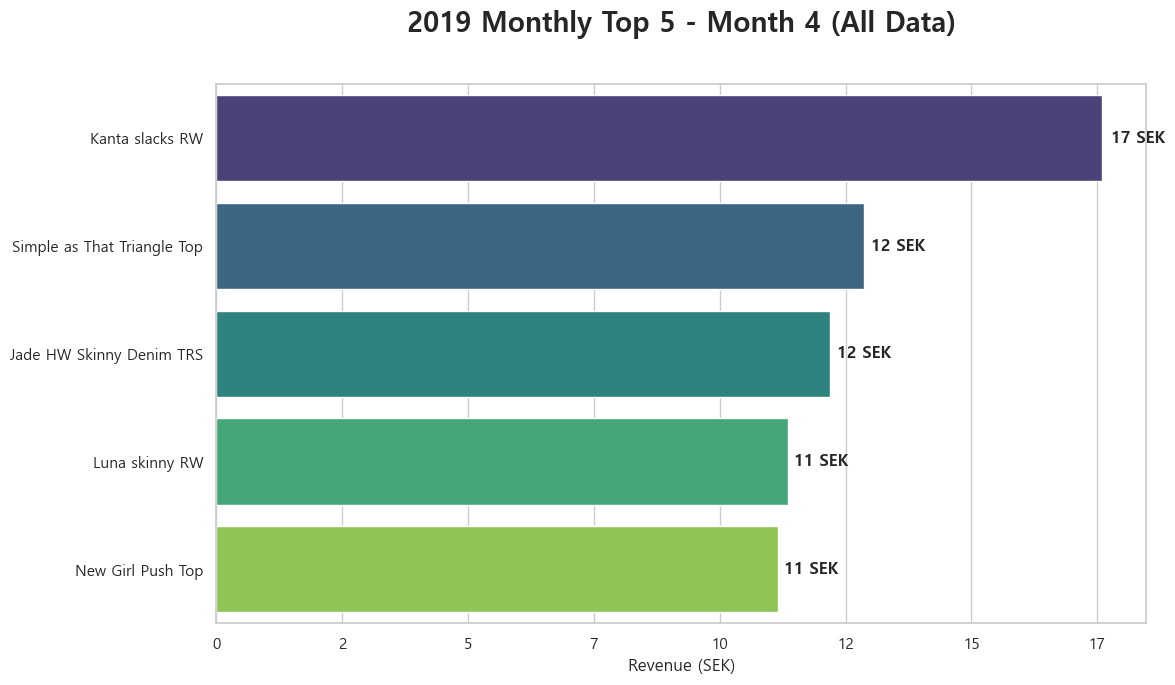

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\3129979546.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')


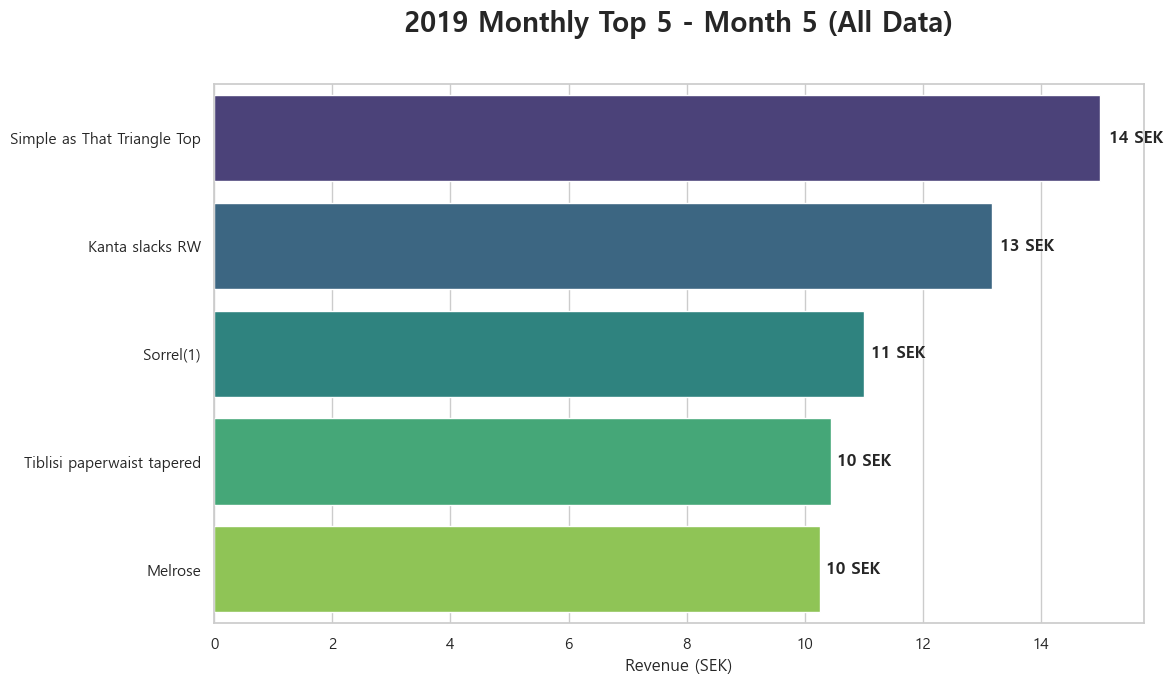

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\3129979546.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')


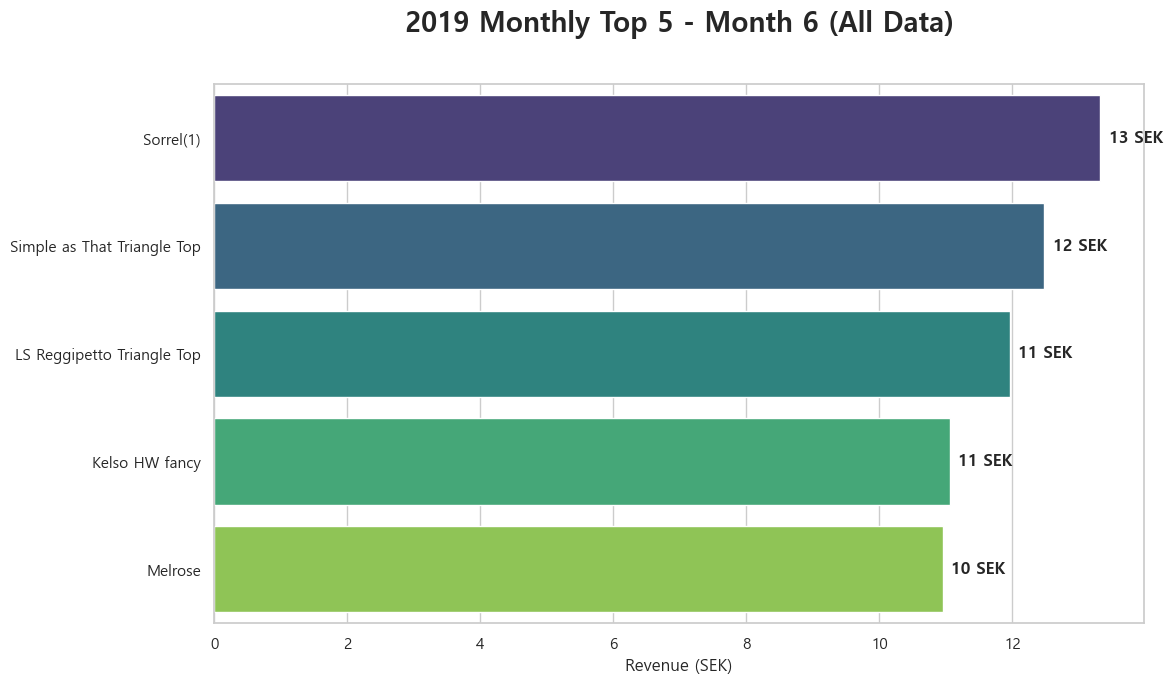

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\3129979546.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')


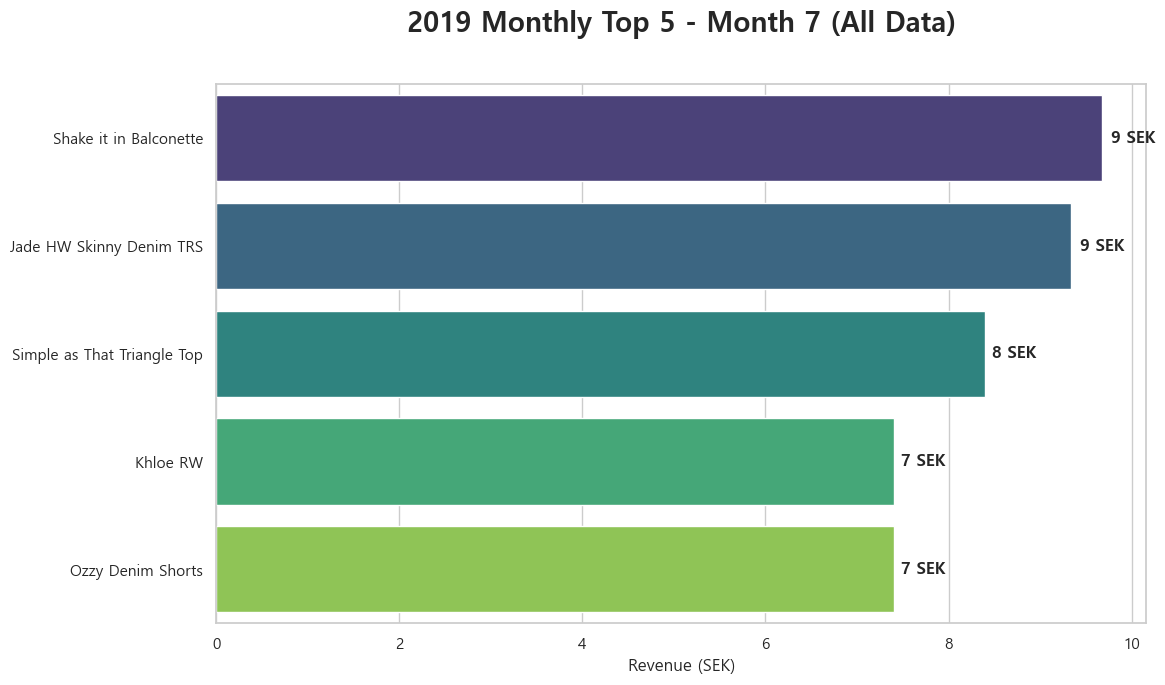

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\3129979546.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')


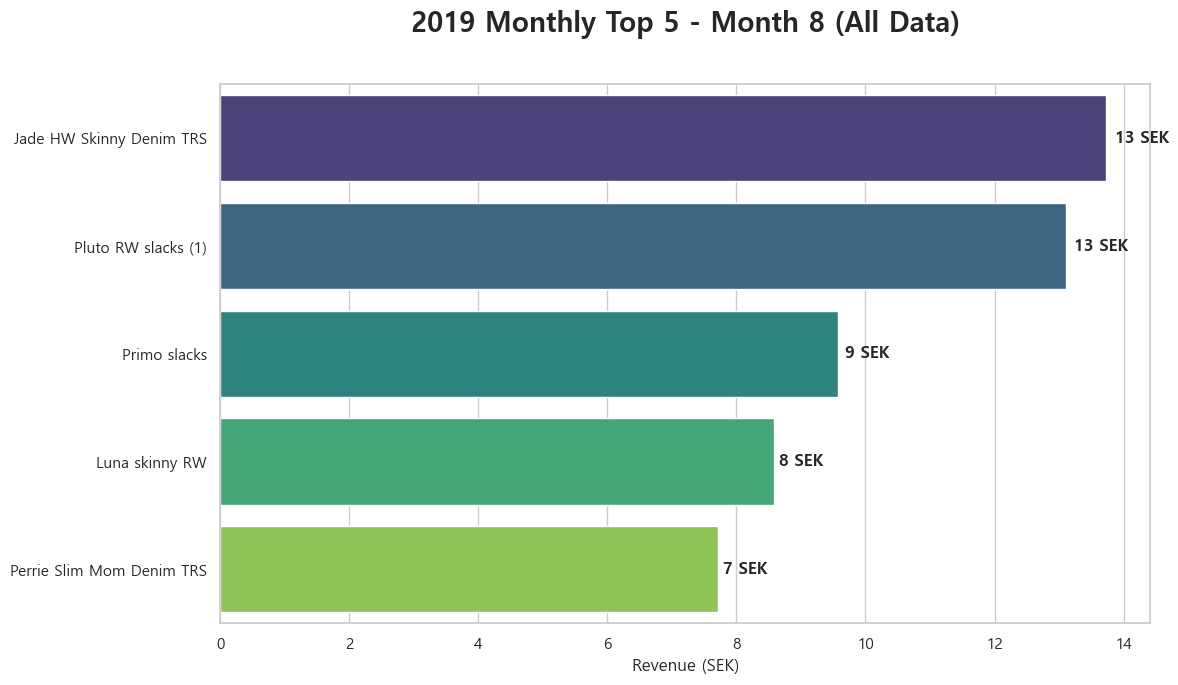

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\3129979546.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')


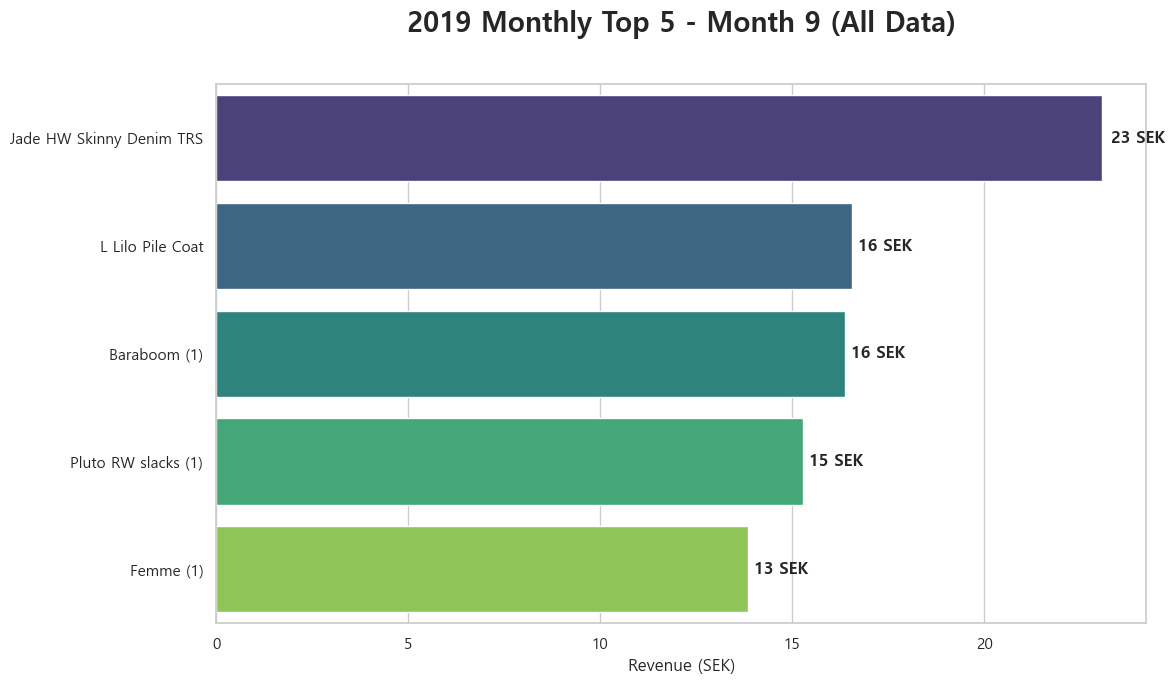

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\3129979546.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')


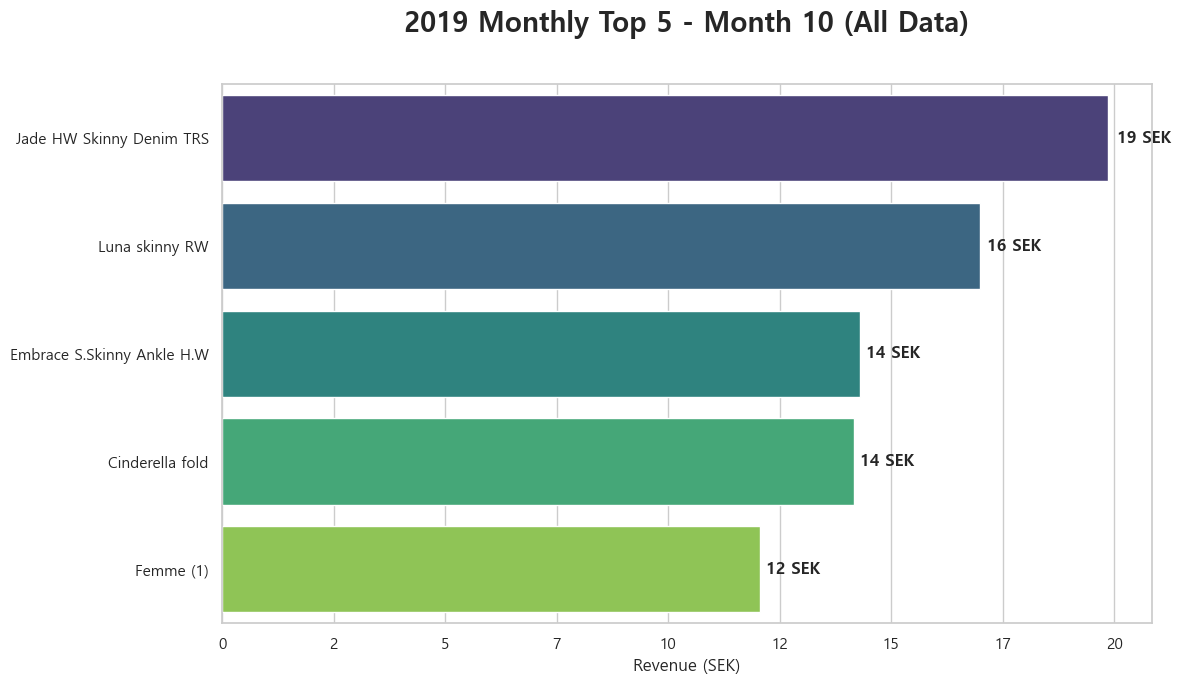

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\3129979546.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')


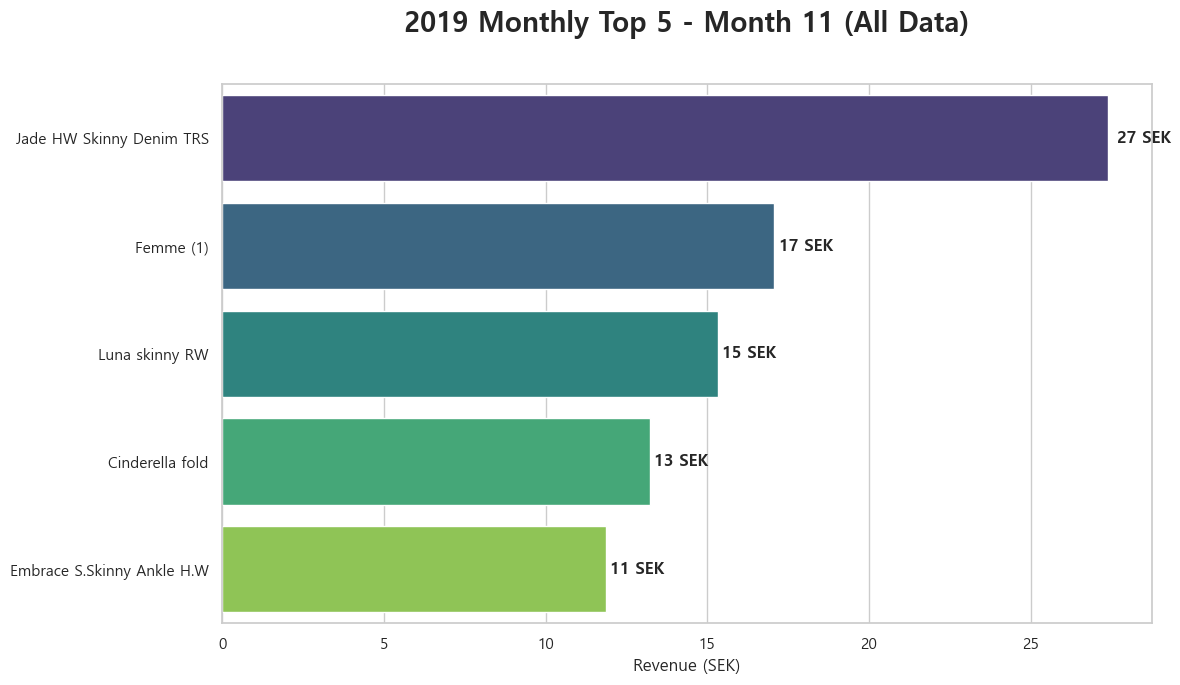

C:\Users\임종민\AppData\Local\Temp\ipykernel_31012\3129979546.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')


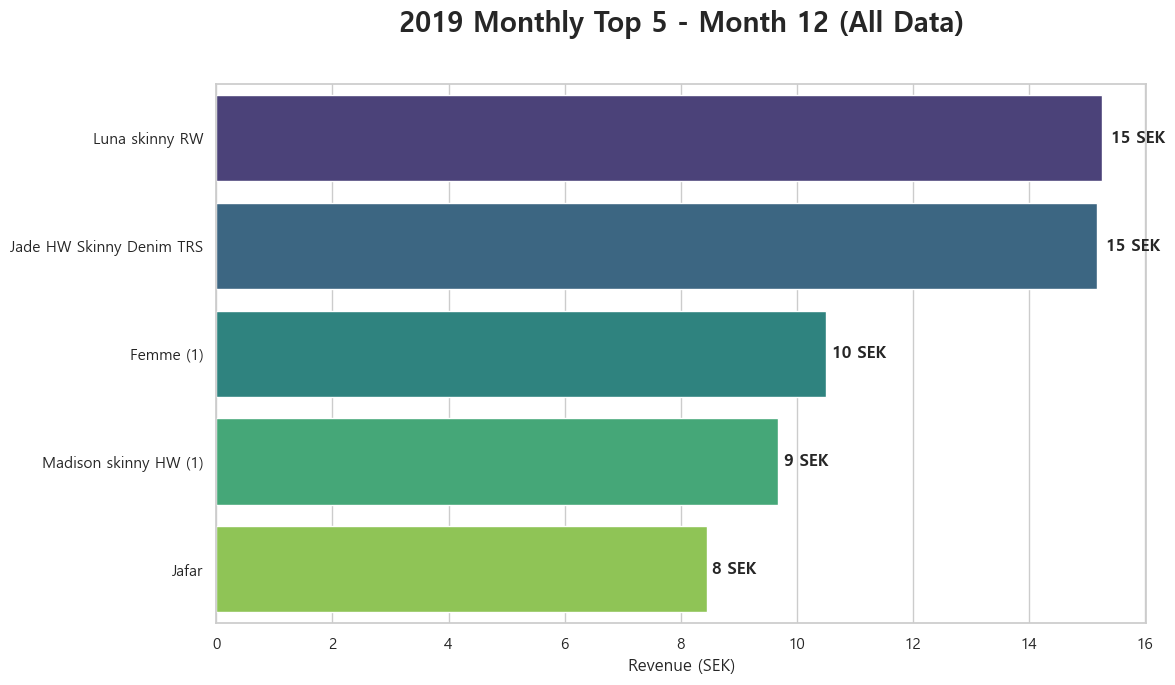

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import os

# 스타일 설정
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

DATA_PATH = "./data/"

# 1. 메모리 최적화를 위해 필요한 컬럼만 로드
transactions = pd.read_csv(os.path.join(DATA_PATH, "transactions_hm.csv"), usecols=['t_dat', 'customer_id', 'article_id', 'price'])
articles = pd.read_csv(os.path.join(DATA_PATH, "articles_hm.csv"), usecols=['article_id', 'prod_name'])
customer = pd.read_csv(os.path.join(DATA_PATH, "customer_hm.csv"), usecols=['customer_id'])

# 2. 2019년 데이터 즉시 필터링 (메모리 확보)
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
df_2019 = transactions[transactions['t_dat'].dt.year == 2019].copy()
df_2019['month'] = df_2019['t_dat'].dt.month
del transactions # 원본 삭제

# 3. 모든 거래를 유지하는 Left Join
df_all = df_2019.merge(customer, on="customer_id", how="left").merge(articles, on="article_id", how="left")

# 4. 1~12월 그래프 순차 출력
for m in range(1, 13):
    data = df_all[df_all['month'] == m].groupby('prod_name')['price'].sum().nlargest(5).reset_index()
    data.columns = ['prod_name', 'revenue']
    if data.empty: continue
        
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(x='revenue', y='prod_name', data=data, palette='viridis')
    
    # 상단 제목 (빨간 동그라미 스타일)
    plt.title(f'2019 Monthly Top 5 - Month {m} (All Data)', fontsize=20, pad=30, fontweight='bold', y=1.02)
    
    # 막대 옆 금액 표시
    for p in ax.patches:
        ax.text(p.get_width() * 1.01, p.get_y() + p.get_height()/2, f'{int(p.get_width()):,} SEK', va='center', fontweight='bold')
    
    # X축 포맷 설정
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.xlabel('Revenue (SEK)', fontsize=12)
    plt.ylabel('')
    plt.subplots_adjust(top=0.88)
    plt.show()

In [128]:
# 1. 6월 데이터 필터링 및 Jade 데님 순위 추출
june_sales = monthly_sales[monthly_sales['month'] == 6].copy()
june_sales['rank'] = june_sales['price'].rank(ascending=False, method='min')

target_item = 'Jade HW Skinny Denim TRS'
june_rank_info = june_sales[june_sales['prod_name'] == target_item]

# 2. 결과 출력 (6월 순위 및 연간 순위 요약)
print(f"Product: {target_item}")
print("-" * 30)

if not june_rank_info.empty:
    june_rank = int(june_rank_info['rank'].values[0])
    print(f"June Rank: {june_rank}")
else:
    print("June Data: Not Found")

print("-" * 30)
print("Monthly Rank History (1-12):")
print(result[['month', 'rank']].sort_values('month').to_string(index=False))


Product: Jade HW Skinny Denim TRS
------------------------------
June Rank: 11
------------------------------
Monthly Rank History (1-12):
 month  rank
     1   1.0
     2   1.0
     3   1.0
     4   3.0
     5   6.0
     6  11.0
     7   2.0
     8   1.0
     9   1.0
    10   1.0
    11   1.0
    12   2.0


In [130]:
import pandas as pd

# df_items에 해당 컬럼이 있는지 확인하고 merge합니다.
df_items_sub = df_items[['article_id', 'prod_name', 'product_group_name']]
df_merge_detail = pd.merge(df_trans[df_trans['month'] == 6], df_items_sub, on='article_id', how='left')

# 2. 6월 상품별 매출 합계 및 순위 계산
june_analysis = df_merge_detail.groupby(['prod_name', 'product_group_name'])['price'].sum().reset_index()
june_analysis = june_analysis.sort_values(by='price', ascending=False).reset_index(drop=True)
june_analysis['rank'] = june_analysis.index + 1

# 3. 1위부터 11위까지 출력
print("2019 June Sales Top 11 Analysis")
print("-" * 70)
print(june_analysis.head(11)[['rank', 'prod_name', 'product_group_name']].to_string(index=False))
print("-" * 70)

2019 June Sales Top 11 Analysis
----------------------------------------------------------------------
 rank                   prod_name product_group_name
    1                   Sorrel(1)  Garment Full body
    2 Simple as That Triangle Top           Swimwear
    3  LS Reggipetto Triangle Top           Swimwear
    4              Kelso HW fancy Garment Lower body
    5           Ozzy Denim Shorts Garment Lower body
    6        LS Charlie  Swimsuit           Swimwear
    7          Waleo HW wide full Garment Lower body
    8  Tiblisi paperwaist tapered Garment Lower body
    9                     Melrose  Garment Full body
   10                     Sorreli  Garment Full body
   11    Jade HW Skinny Denim TRS Garment Lower body
----------------------------------------------------------------------


In [4]:
# 1. Femme 제품들의 월별 매출 합계 계산
femme_monthly_trend = femme_sales.groupby('month')['price'].sum().reset_index()

# 2. 비교를 위해 전체 제품의 월별 매출 합계 계산 (선택 사항이지만 흐름 파악에 좋음)
total_monthly_trend = df_trans.groupby('month')['price'].sum().reset_index()

# 3. 결과 출력
print("📊 [Femme 제품군 월별 매출 추이]")
print("-" * 45)
print(femme_monthly_trend.to_string(index=False))
print("-" * 45)

# 4. 분석 결과 해석 출력
max_month = femme_monthly_trend.loc[femme_monthly_trend['price'].idxmax(), 'month']
sep_sales = femme_monthly_trend[femme_monthly_trend['month'] == 9]['price'].values[0] if 9 in femme_monthly_trend['month'].values else 0
aug_sales = femme_monthly_trend[femme_monthly_trend['month'] == 8]['price'].values[0] if 8 in femme_monthly_trend['month'].values else 0

print(f"💡 분석 포인트:")
if sep_sales > aug_sales * 2: # 8월보다 9월에 2배 이상 팔렸다면
    print(f"- 8월 대비 9월 매출이 급증했습니다. 9월 신규 런칭 효과가 강력해 보입니다.")
else:
    print(f"- 이전부터 서서히 팔리다가 {int(max_month)}월에 정점을 찍었습니다.")

print(f"- Femme 제품이 가장 많이 팔린 달은 {int(max_month)}월입니다.")

📊 [Femme 제품군 월별 매출 추이]
---------------------------------------------
 month     price
     1  5.087475
     2  1.846373
     3  0.761814
     4  0.318593
     5  0.267780
     6  0.083898
     8  1.937356
     9 14.014712
    10 12.068915
    11 17.048712
    12 10.589780
---------------------------------------------
💡 분석 포인트:
- 8월 대비 9월 매출이 급증했습니다. 9월 신규 런칭 효과가 강력해 보입니다.
- Femme 제품이 가장 많이 팔린 달은 11월입니다.


In [5]:
# 1. Femme 제품들의 제품별 '최초 판매월' 계산
# femme_sales 데이터(전체 기간)를 기준으로 합니다.
femme_launch_check = femme_sales.groupby('article_id').agg(
    first_sale_month=('month', 'min'),
    total_sales_count=('article_id', 'count')
).reset_index()

# 2. 상품명과 카테고리 합치기
femme_launch_analysis = pd.merge(
    femme_launch_check, 
    df_items[['article_id', 'prod_name', 'product_group_name']], 
    on='article_id'
)

# 3. 결과 분류 및 출력
print("📊 [Femme 제품군 출시 시점 분석]")
print("=" * 65)

# 9월 신상 (1~8월엔 판매 기록이 전혀 없다가 9월에 처음 등장)
new_arrival_sep = femme_launch_analysis[femme_launch_analysis['first_sale_month'] == 9]
# 9월 이전 출시 (이미 팔리고 있었으나 9월부터 베스트셀러가 된 경우)
seasonal_carryover = femme_launch_analysis[femme_launch_analysis['first_sale_month'] < 9]

print(f"🚀 9월 신제품 (New Arrivals): {len(new_arrival_sep)}개 상품")
if not new_arrival_sep.empty:
    print(new_arrival_sep[['prod_name', 'first_sale_month', 'product_group_name']].head(10).to_string(index=False))

print("\n" + "-" * 65)
print(f"🍂 이전 출시 가을 상품 (Seasonal Items): {len(seasonal_carryover)}개 상품")
if not seasonal_carryover.empty:
    print(seasonal_carryover[['prod_name', 'first_sale_month', 'product_group_name']].head(10).to_string(index=False))
print("=" * 65)

📊 [Femme 제품군 출시 시점 분석]
🚀 9월 신제품 (New Arrivals): 1개 상품
prod_name  first_sale_month product_group_name
Femme (1)                 9 Garment Upper body

-----------------------------------------------------------------
🍂 이전 출시 가을 상품 (Seasonal Items): 12개 상품
  prod_name  first_sale_month product_group_name
  Femme (1)                 1 Garment Upper body
  Femme (1)                 1 Garment Upper body
  Femme (1)                 1 Garment Upper body
  Femme (1)                 1 Garment Upper body
  Femme (1)                 1 Garment Upper body
  Femme (1)                 8 Garment Upper body
  Femme (1)                 8 Garment Upper body
  Femme (1)                 8 Garment Upper body
  Femme (1)                 8 Garment Upper body
Femme fatal                 3  Garment Full body


In [10]:
import pandas as pd
import os

# 1. 경로 설정 및 데이터 로드
DATA_PATH = "./data/"
customer = pd.read_csv(os.path.join(DATA_PATH, "customers_c.csv"))
transactions = pd.read_csv(os.path.join(DATA_PATH, "transactions_c.csv"))
articles = pd.read_csv(os.path.join(DATA_PATH, "articles_c.csv"))

# 2. 모든 데이터를 살리는 Left Join
df_all = transactions.merge(customer, on="customer_id", how="left")
df_all = df_all.merge(articles, on="article_id", how="left")

# 3. 날짜 데이터 처리
df_all["t_dat"] = pd.to_datetime(df_all["t_dat"])
df_all["year"] = df_all["t_dat"].dt.year
df_all["month"] = df_all["t_dat"].dt.month

# 4. 2019년 필터링
df_2019_all = df_all[df_all["year"] == 2019].copy()
df_2019_all['revenue'] = df_2019_all['price']
df_2019_all['sales_count'] = 1

# 5. 월별 루프를 돌며 TOP 5 추출 및 '즉시 출력'
print("✅ [2019년 전수 분석] 월별 매출 TOP 5 리스트 출력을 시작합니다.")

for m in range(1, 13):
    # 해당 월 필터링
    df_month = df_2019_all[df_2019_all['month'] == m]
    
    # 매출 기준 TOP 5 추출
    top_5 = df_month.groupby('prod_name').agg({
        'revenue': 'sum', 
        'sales_count': 'sum'
    }).nlargest(5, 'revenue').reset_index()
    
    # 출력 구간
    print(f"\n{'-'*40}")
    print(f"📅 2019년 {m}월 베스트셀러 TOP 5")
    print(f"{'-'*40}")
    
    if not top_5.empty:
        display(top_5.style.hide(axis='index'))
    else:
        print(f"⚠️ {m}월 데이터가 존재하지 않습니다.")

✅ [2019년 전수 분석] 월별 매출 TOP 5 리스트 출력을 시작합니다.

----------------------------------------
📅 2019년 1월 베스트셀러 TOP 5
----------------------------------------


prod_name,revenue,sales_count
Jade HW Skinny Denim TRS,19.949390,595
Shaping Skinny H.W,14.767949,190
Milk RW slacks,11.100864,332
Luna skinny RW,10.519254,348
Jade Denim TRS,9.642610,423



----------------------------------------
📅 2019년 2월 베스트셀러 TOP 5
----------------------------------------


prod_name,revenue,sales_count
Jade HW Skinny Denim TRS,17.629051,541
Shaping Skinny H.W,11.706254,150
SUPREME tights,11.092153,348
Luna skinny RW,9.427830,310
Shaping Skinny R.W,8.609220,120



----------------------------------------
📅 2019년 3월 베스트셀러 TOP 5
----------------------------------------


prod_name,revenue,sales_count
Jade HW Skinny Denim TRS,16.023458,482
Shaping Skinny H.W,11.180475,152
Luna skinny RW,10.835729,348
Gyda-,10.110966,307
Jennifer (1),9.129898,186



----------------------------------------
📅 2019년 4월 베스트셀러 TOP 5
----------------------------------------


prod_name,revenue,sales_count
Kanta slacks RW,17.593814,714
Simple as That Triangle Top,12.872881,523
Jade HW Skinny Denim TRS,12.199254,374
Luna skinny RW,11.360729,359
New Girl Push Top,11.162830,377



----------------------------------------
📅 2019년 5월 베스트셀러 TOP 5
----------------------------------------


prod_name,revenue,sales_count
Simple as That Triangle Top,14.990882,620
Kanta slacks RW,13.164593,538
Sorrel(1),11.006610,337
Tiblisi paperwaist tapered,10.442424,423
Melrose,9.797763,231



----------------------------------------
📅 2019년 6월 베스트셀러 TOP 5
----------------------------------------


prod_name,revenue,sales_count
Sorrel(1),13.312000,406
Simple as That Triangle Top,12.481017,504
LS Reggipetto Triangle Top,11.957831,358
Ozzy Denim Shorts,10.891034,438
LS Charlie Swimsuit,10.306509,177



----------------------------------------
📅 2019년 7월 베스트셀러 TOP 5
----------------------------------------


prod_name,revenue,sales_count
Shake it in Balconette,9.676915,484
Jade HW Skinny Denim TRS,9.341356,283
Simple as That Triangle Top,8.396000,344
Khloe RW,7.402034,269
Ozzy Denim Shorts,7.401170,305



----------------------------------------
📅 2019년 8월 베스트셀러 TOP 5
----------------------------------------


prod_name,revenue,sales_count
Jade HW Skinny Denim TRS,13.726068,421
Pluto RW slacks (1),13.105339,401
Primo slacks,9.580373,392
Luna skinny RW,8.580153,294
Perrie Slim Mom Denim TRS,7.715678,189



----------------------------------------
📅 2019년 9월 베스트셀러 TOP 5
----------------------------------------


prod_name,revenue,sales_count
Jade HW Skinny Denim TRS,23.067949,722
L Lilo Pile Coat,16.547661,148
Baraboom (1),16.361186,531
Pluto RW slacks (1),15.280746,473
Luna skinny RW,13.674966,430



----------------------------------------
📅 2019년 10월 베스트셀러 TOP 5
----------------------------------------


prod_name,revenue,sales_count
Jade HW Skinny Denim TRS,19.855373,604
Luna skinny RW,16.982305,565
Embrace S.Skinny Ankle H.W,14.292441,218
Cinderella fold,14.169593,346
Gyda- (1),10.604017,334



----------------------------------------
📅 2019년 11월 베스트셀러 TOP 5
----------------------------------------


prod_name,revenue,sales_count
Jade HW Skinny Denim TRS,27.383610,906
Luna skinny RW,15.318441,513
Cinderella fold,13.226305,375
Femme (1),12.210305,90
Embrace S.Skinny Ankle H.W,11.865153,196



----------------------------------------
📅 2019년 12월 베스트셀러 TOP 5
----------------------------------------


prod_name,revenue,sales_count
Luna skinny RW,15.256237,598
Jade HW Skinny Denim TRS,15.175593,469
Madison skinny HW (1),9.678780,378
Jafar,8.447695,332
Embrace S.Skinny Ankle H.W,7.916814,133
